In [ ]:
# !pip isntall librosa
# !pip freeze > requirements.txt

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

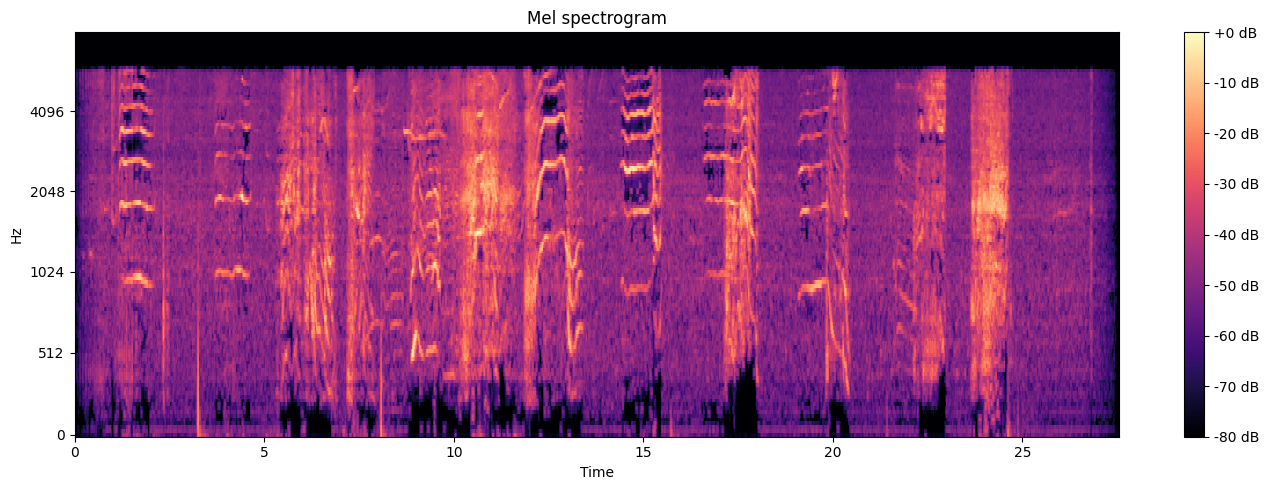

In [5]:
# Load the audio file
audio_path = './data/call-examples.mp3'
y, sr = librosa.load(audio_path)
# Create the spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
# Convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()